# Using insurnace dataset plot step and sigmoid function used in Neural Network 

In [1]:
from tensorflow import keras 
import tensorflow as tf 
import os 
import matplotlib.pyplot as plt 
import matplotlib
import pandas as pd

In [2]:
df_insurance = pd.read_csv("data/video3/insurance_data.csv")

In [3]:
df_insurance.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


<Axes: xlabel='age', ylabel='bought_insurance'>

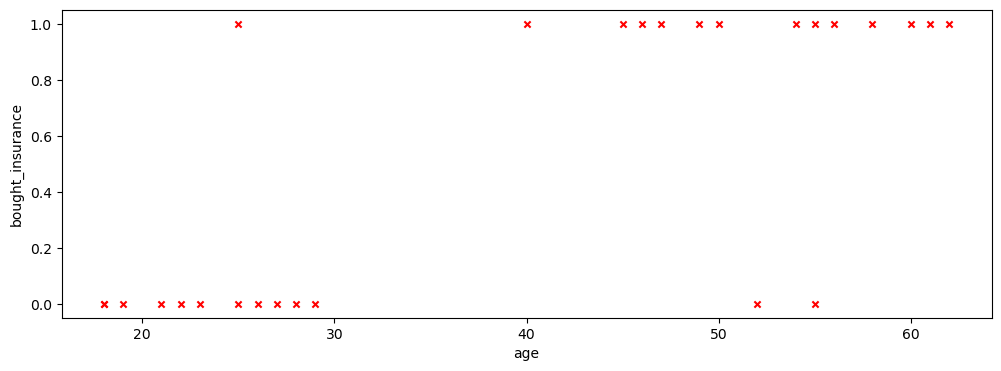

In [4]:
# plot this points on X-Y axis 
df_insurance.plot(kind="scatter", x="age", y="bought_insurance", figsize=(12,4), grid=False, marker="x", c="red")

In [5]:
df_insurance.shape

(27, 2)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_insurance[['age']],df_insurance["bought_insurance"],train_size=0.8)

In [7]:
# using scikit learn perform linear regression on this dataset to get the best possible fitting line between the point 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
model.intercept_, model.coef_

(array([-5.82408733]), array([[0.1525684]]))

In [9]:
y_pred = model.predict(X_test)

In [10]:
max(df_insurance["age"]), min(df_insurance["age"])

(62, 18)

In [11]:
import math
def sigmoid(z):
    return [1/(1+math.exp(-y)) for y in z]

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/var/folders/kx/s0nzgxq96zgdm61_51783vnm0000gn/T/ipykernel_18365/686301967.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [1/(1+math.exp(-y)) for y in z]


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

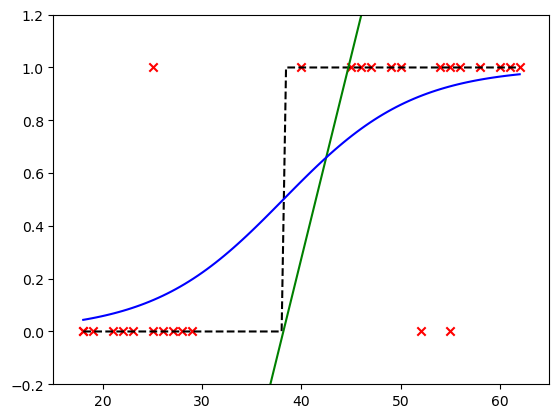

In [12]:
import numpy as np 

# get 100 points betweeen 18 to 62 
X_test_1 = np.linspace(18, 62, 100)
y_test_1 = model.predict(X_test_1.reshape(-1, 1))

# plot the linear line passing through the points 
X_test_2 = X_test_1
y_test_2 = model.coef_ * X_test_2.reshape(-1, 1) + model.intercept_

# plot using sigmoid function 
X_test_3 = X_test_1 
y_test_3 = sigmoid(y_test_2)

# plot this 
plt.axis([15, 65, -0.2, 1.2])
plt.scatter(x=df_insurance["age"], y=df_insurance["bought_insurance"], c="red", marker="x")
plt.plot(X_test_1, y_test_1, "k--")
plt.plot(X_test_2, y_test_2, "g-")
plt.plot(X_test_3, y_test_3, "b-")
plt.plot

In [13]:
# make prediction for age 40
X_new = [[40]]
y_pred_new = model.predict(X_new)

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [14]:
# looks like 40 age is good to buy insurance 
y_pred_new

array([1])

# Exercise 
Employee Retention dataset on https://www.kaggle.com/datasets/giripujar/hr-analytics


In [15]:
# read the csv file 
df = pd.read_csv('data/video3/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
df.shape

(14999, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


```
Good that there are no missing values

satisfaction_level looks like a ratio 
last_evaluation score is also a ratio 
number_of_project is # of projects the employee has worked 
average_monthly_hours spent by the employee on the project 
time_spend_company - no of years spent in the company 
work_accident - no of accident happend to this employee on workplace 
left - boolean value: 1 - yes ; 0 - no 
promotion_5_year - boolean value: 1 - yes; 0 - no 
Department - Categorical: name of the current department 
Salary - categorical: label indicating if salary is high or low 

```

In [18]:
# check if there are any duplicates 
df.duplicated().sum()

np.int64(3008)

In [19]:
# get rid of these duplicate values
df.drop_duplicates(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [21]:
# get numerical column name 
numeric_cols = df.iloc[:1, :8].columns

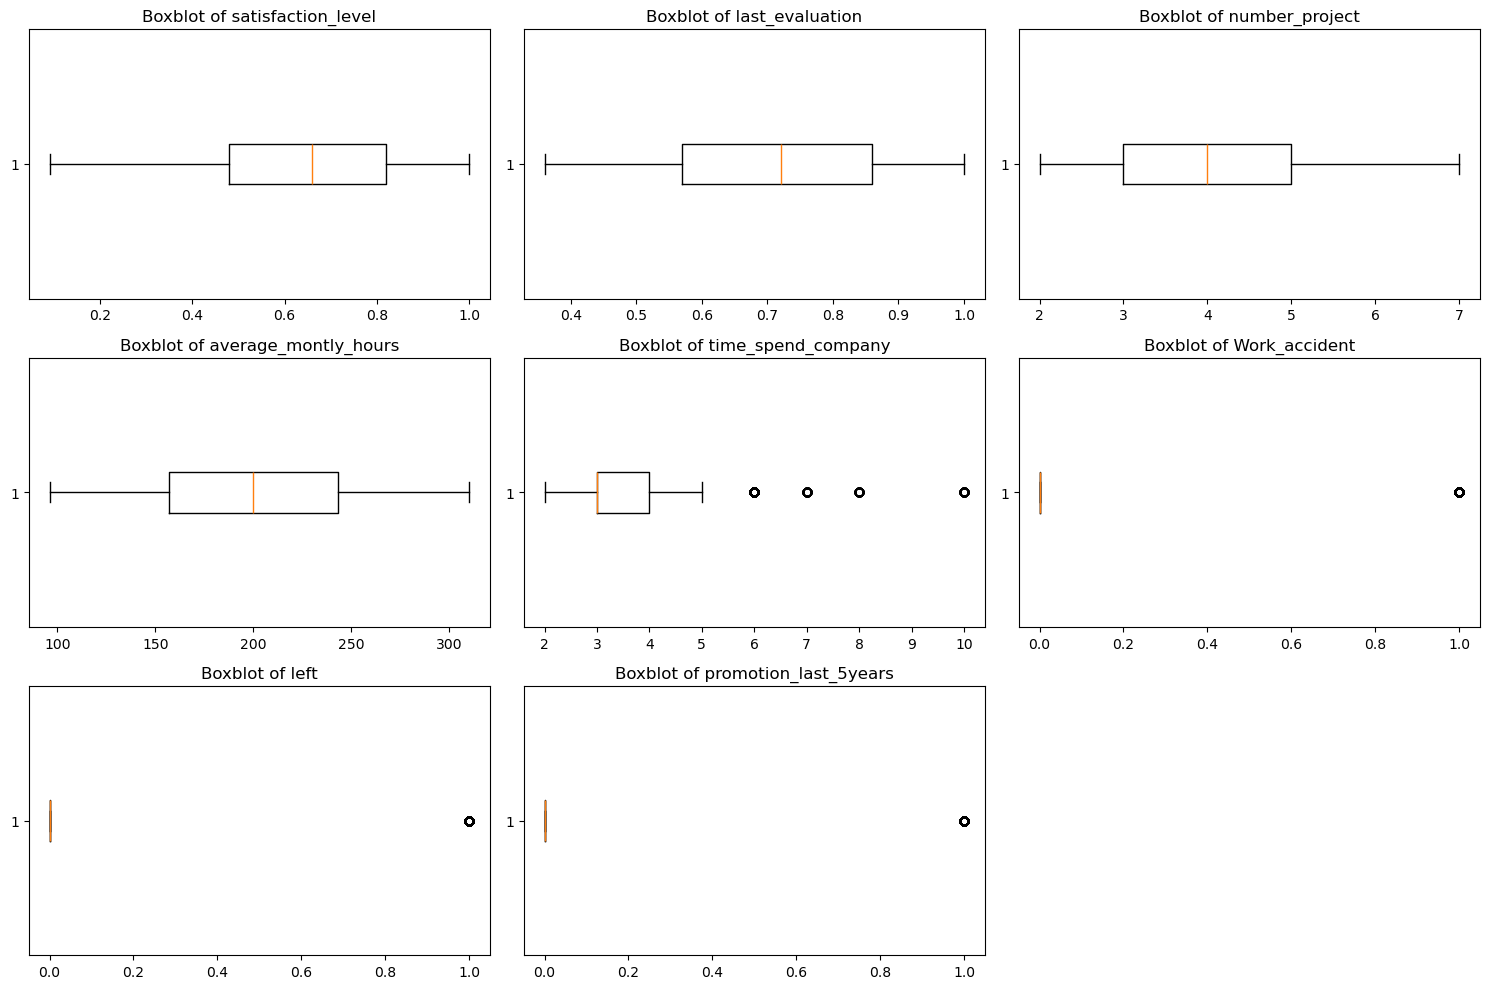

In [22]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_cols, start= 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[feature], vert= False)
    plt.title(f'Boxblot of {feature}')

plt.tight_layout()
plt.show()

In [23]:
df[numeric_cols].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [24]:
# there are maby outliers in the dataset especially for time_spend_company. Do oldies leave company easily? 
df[df["time_spend_company"] >= 5][["time_spend_company","left"]].value_counts()

time_spend_company  left
5                   0       580
                    1       482
6                   0       433
                    1       109
10                  0       107
7                   0        94
8                   0        81
Name: count, dtype: int64

In [25]:
# people who have stayed beyond 6 years are not leaving the company - get rid of them no useful pattern will be observed for them 
# even the ratio of people after completing 6 years is 433/(433+109) ~ 80% are not leaving 
Q1 = df["time_spend_company"].quantile(0.25)
Q3 = df["time_spend_company"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["time_spend_company"] >= (Q1 - 1.5 * IQR)) & (df["time_spend_company"] <= (Q3 + 1.5 * IQR))]

In [26]:
Q1, Q3, IQR

(np.float64(3.0), np.float64(4.0), np.float64(1.0))

In [27]:
df[df["time_spend_company"] >= 5][["time_spend_company","left"]].value_counts()

time_spend_company  left
5                   0       580
                    1       482
Name: count, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11167 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11167 non-null  float64
 1   last_evaluation        11167 non-null  float64
 2   number_project         11167 non-null  int64  
 3   average_montly_hours   11167 non-null  int64  
 4   time_spend_company     11167 non-null  int64  
 5   Work_accident          11167 non-null  int64  
 6   left                   11167 non-null  int64  
 7   promotion_last_5years  11167 non-null  int64  
 8   Department             11167 non-null  object 
 9   salary                 11167 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 959.7+ KB


In [29]:
# get rid of feature promotion_last_5years and Work_accident - they seem to be having outliers only
df.drop(["Work_accident", "promotion_last_5years"], inplace=True, axis=1)

In [30]:
numeric_cols = numeric_cols.delete(numeric_cols.get_loc("Work_accident"))

In [31]:
numeric_cols = numeric_cols.delete(numeric_cols.get_loc("promotion_last_5years"))

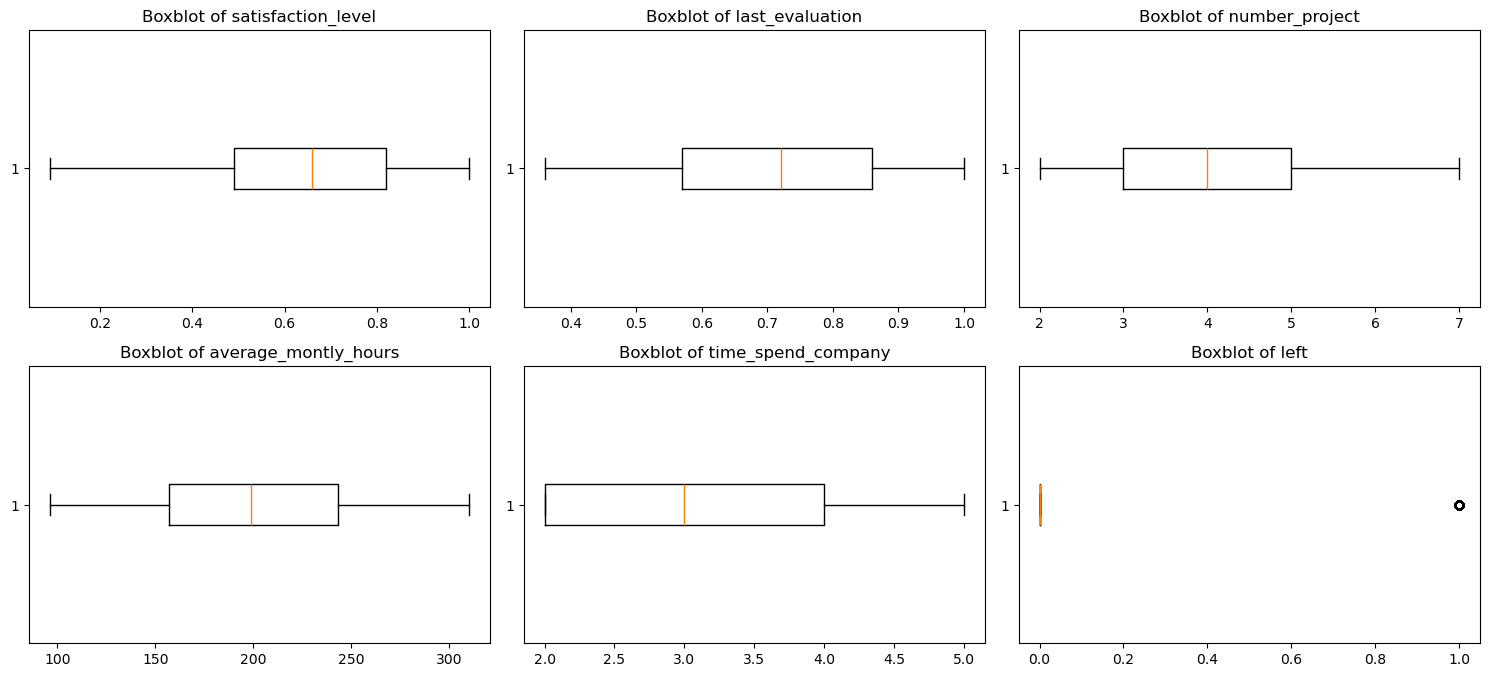

In [32]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_cols, start= 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[feature], vert= False)
    plt.title(f'Boxblot of {feature}')

plt.tight_layout()
plt.show()

#### Exploratory Data Analysis

In [33]:
df["satisfaction_level"].mean()

np.float64(0.6319441210710128)

Text(0, 0.5, 'Frequency')

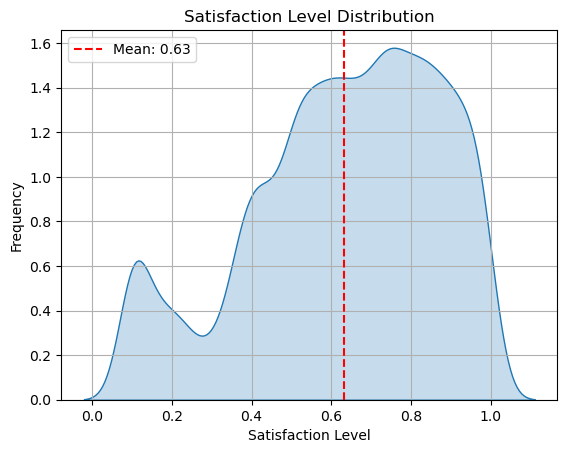

In [34]:
import seaborn as sns

# Satisfaction Level - plot frequency distribution using Kernel Density Estimate 
ax = sns.kdeplot(df["satisfaction_level"], fill=True)
satisfaction_mean = df["satisfaction_level"].mean() 

plt.axvline(satisfaction_mean, color="red", linestyle="--", label=f"Mean: {satisfaction_mean:.2f}")
plt.grid()
plt.title('Satisfaction Level Distribution')
plt.xlabel('Satisfaction Level')
plt.legend()
plt.ylabel('Frequency')

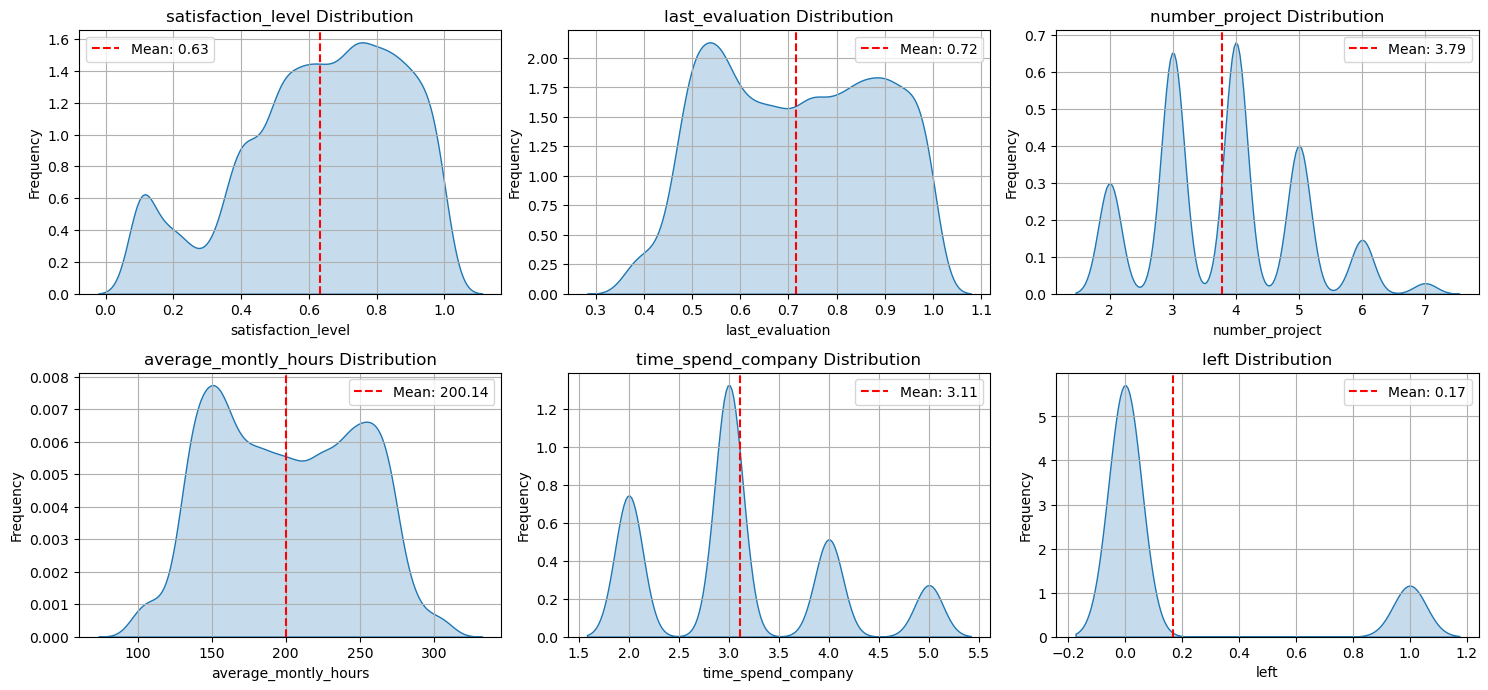

In [35]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_cols, start=1):
    plt.subplot(3, 3, i)
    sns.kdeplot(df[feature], fill=True)
    mean_value = df[feature].mean() 
    plt.axvline(mean_value, color="red", linestyle="--", label=f"Mean: {mean_value:.2f}")

    plt.grid()
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.legend()
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

```
there are distinct distribution for number_project, time_spend_company and left 
use other plots for them 

Text(0.5, 1.0, 'Number of Projects Disribution')

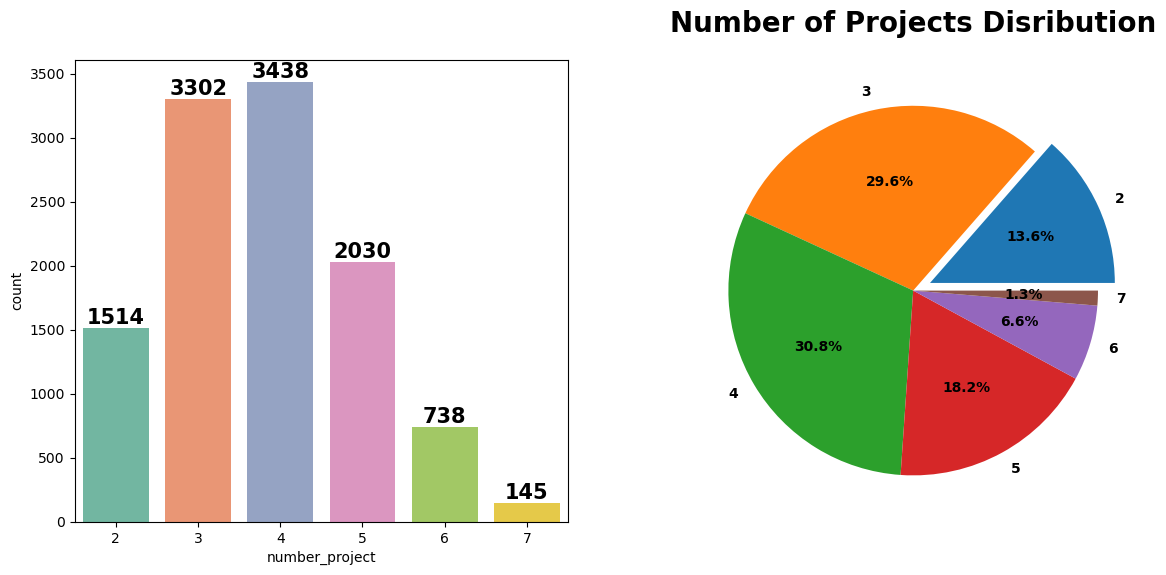

In [36]:
# plot bar chart with frequency for them 
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
ax = sns.countplot(df, x="number_project", palette="Set2", hue="number_project", legend=False,)
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)

count = df['number_project'].value_counts().sort_index()
plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%", colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0 , 0, 0])
plt.title("Number of Projects Disribution",fontweight="black",size=20,pad=20)

Text(0.5, 1.0, 'Number of time spend')

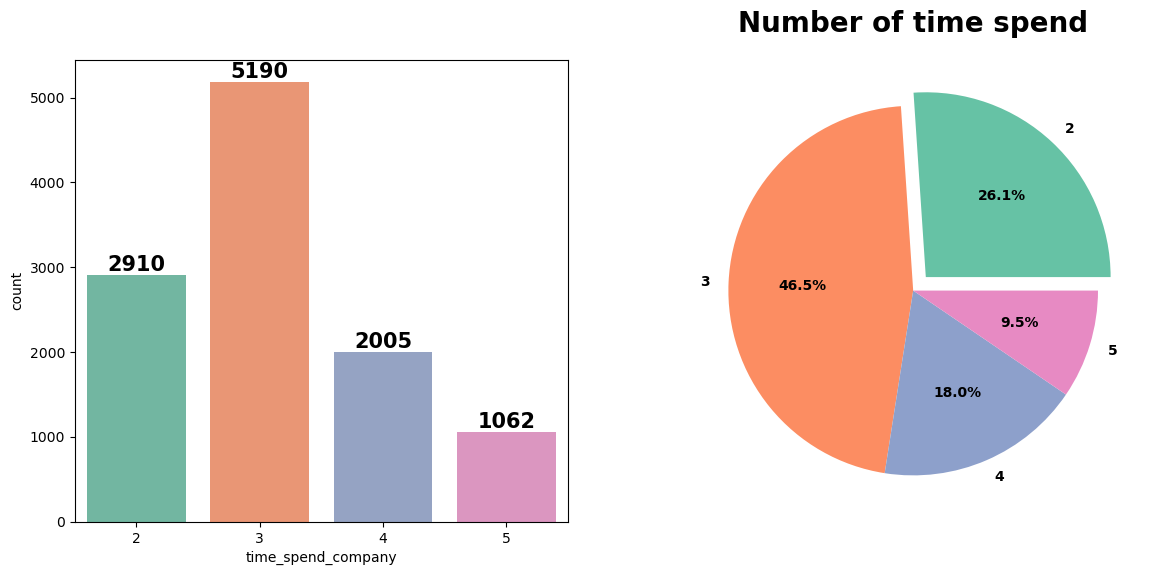

In [37]:
# plot bar chart with frequency for them 
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
ax = sns.countplot(df, x="time_spend_company", palette="Set2", hue="time_spend_company", legend=False,)
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)

count = df['time_spend_company'].value_counts().sort_index()
plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%", colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0])
plt.title("Number of time spend",fontweight="black",size=20,pad=20)

Text(0.5, 1.0, 'Number of left')

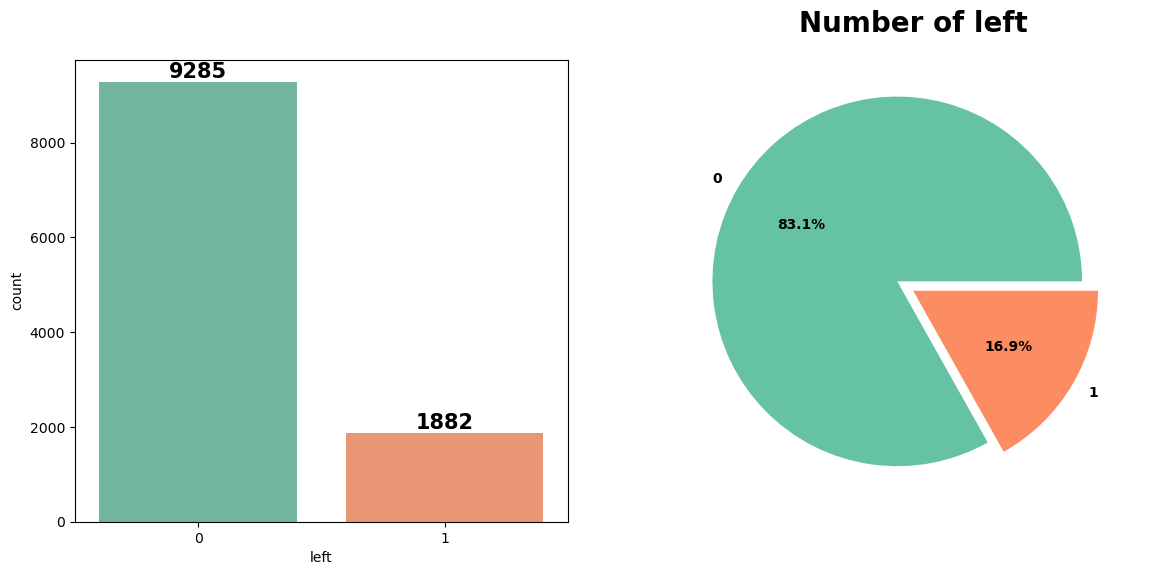

In [38]:
# plot bar chart with frequency for them 
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
ax = sns.countplot(df, x="left", palette="Set2", hue="left", legend=False,)
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)

count = df['left'].value_counts().sort_index()
plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%", colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0])
plt.title("Number of left",fontweight="black",size=20,pad=20)

### Categorical Data

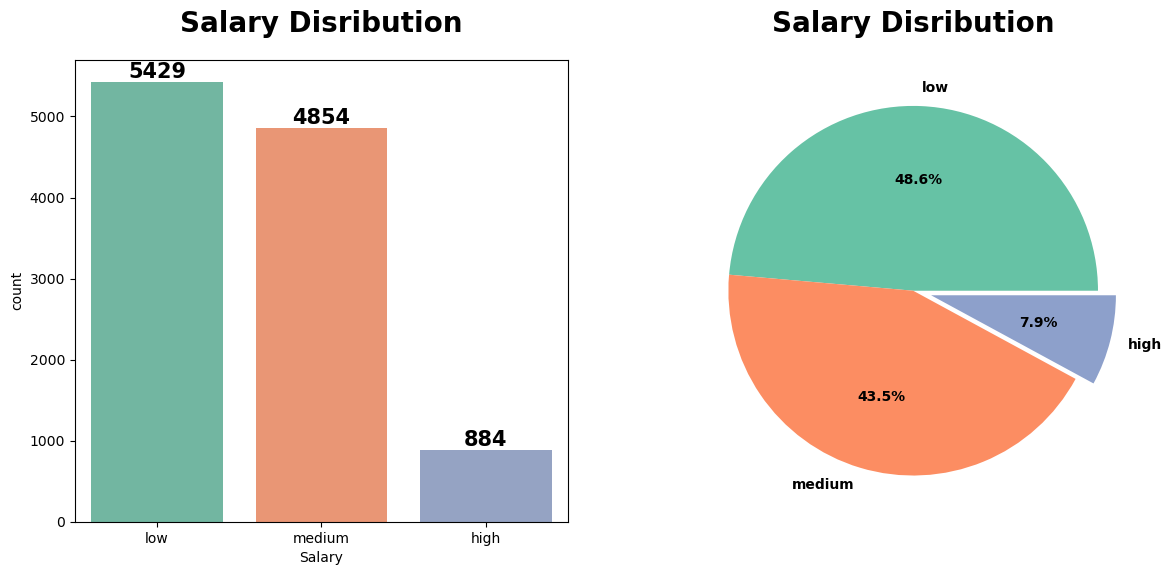

In [39]:
count = df['salary'].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='salary',palette="Set2",  hue="salary", legend=False,)
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('Salary')
plt.title("Salary Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0, 0.1])
plt.title("Salary Disribution",fontweight="black",size=20,pad=20)
plt.show()

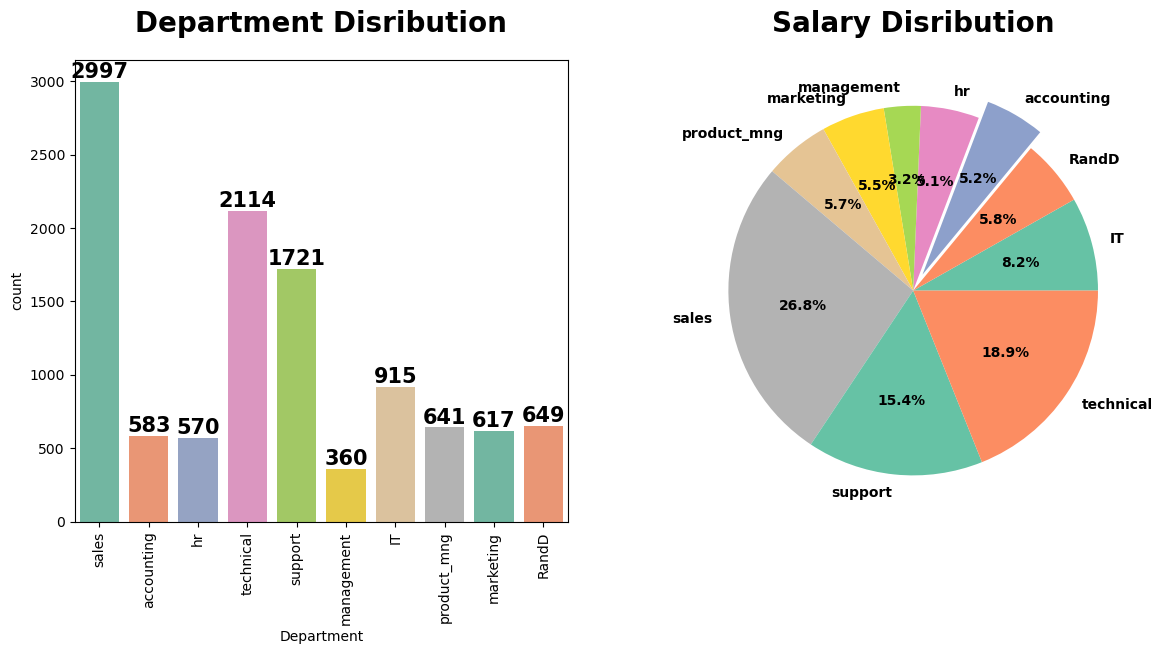

In [40]:
count = df["Department"].value_counts().sort_index()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='Department', palette="Set2", hue="Department", legend=False,)
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('Department')
plt.xticks(rotation="vertical")
plt.title("Department Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0, 0.1, 0, 0, 0,0,0,0,0])
plt.title("Salary Disribution",fontweight="black",size=20,pad=20)
plt.show()

```
Salary can be ordinal encoded as log as low values assigned to Lower, medium value for Medium and high for High salary brackets. 
Let's use ordinal encoding technique here

#### Correlation 

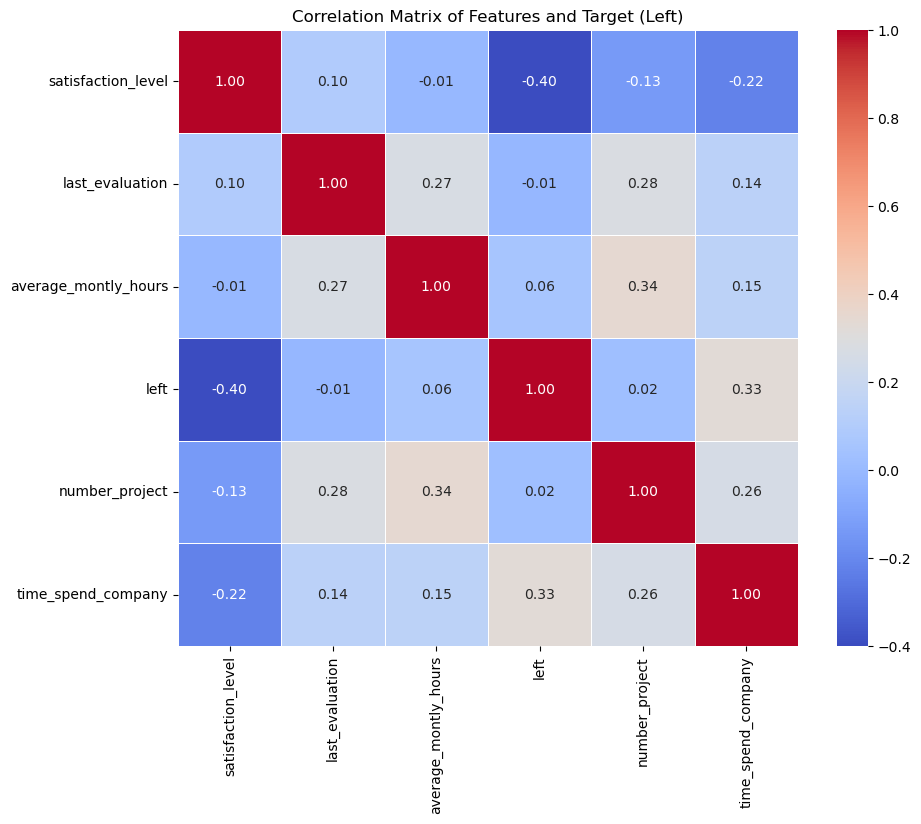

In [41]:
numerical_features_with_target = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'left', 'number_project', 'time_spend_company']

correlation_matrix = df[numerical_features_with_target].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features and Target (Left)')
plt.show()

### Preprocessing 

In [42]:
x = df.drop('left', axis= 1)
y = df['left']

In [43]:
column_list = list(x.columns)

In [44]:
from sklearn.preprocessing import StandardScaler

# scale numerical data
scaler = StandardScaler()

numerical_cols = ['number_project', 'average_montly_hours', 'time_spend_company']
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

In [45]:
for i in numerical_cols:
    column_list.pop(column_list.index(i))

column_list

['satisfaction_level', 'last_evaluation', 'Department', 'salary']

In [46]:
x = pd.get_dummies(x, columns=['Department', 'salary'], drop_first=False)
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,-1.534229,-0.888463,-0.121393,False,False,False,False,False,False,False,True,False,False,False,True,False
2,0.11,0.88,2.760766,1.479699,0.990661,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,1.042768,0.470656,2.102716,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,-1.534229,-0.847277,-0.121393,False,False,False,False,False,False,False,True,False,False,False,True,False
5,0.41,0.50,-1.534229,-0.970834,-0.121393,False,False,False,False,False,False,False,True,False,False,False,True,False


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Logistic Regression model 

In [48]:
from sklearn.linear_model import LogisticRegression

logis_clf = LogisticRegression() 
logis_clf.fit(X_train, y_train)

LogisticRegression()

In [49]:
logis_clf.score(X_train, y_train)

0.8223441173178103

In [50]:
y_pred = logis_clf.predict(X_test)

In [51]:
y_score = logis_clf.score(X_test, y_test)

In [52]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

logis_accuracy, logis_precision, logis_recall = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)
logis_accuracy, logis_precision, logis_recall

(0.8200537153088631, 0.46464646464646464, 0.23711340206185566)

In [53]:
conf_mx = confusion_matrix(y_test, y_pred)

In [54]:
conf_mx

array([[1740,  106],
       [ 296,   92]])

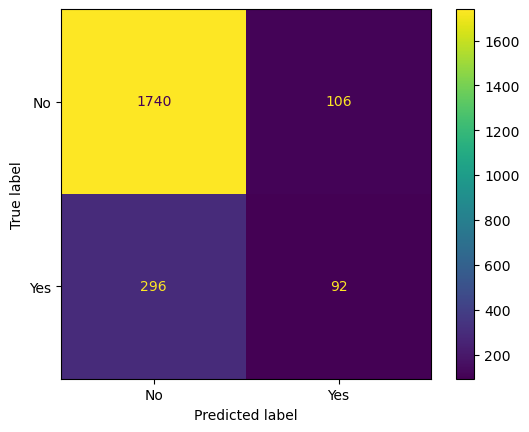

In [55]:
# visualize this 
fig = ConfusionMatrixDisplay(conf_mx, display_labels= ['No', 'Yes'], )
fig.plot()

### SVC Model

In [56]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {'kernel': ['linear', 'poly', 'rbf'],
              'C': [0.1, 1, 10]}

svm = SVC()

In [58]:
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']})

In [59]:
best_estimator = grid_search.best_estimator_

In [60]:
best_estimator

SVC(C=10)

In [61]:
best_estimator.score(X_train, y_train)

0.9761558267099518

In [62]:
best_estimator.score(X_test, y_test)

0.9771709937332139

In [63]:
y_pred = best_estimator.predict(X_test)

In [64]:
svc_accuracy, svc_precision, svc_recall = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)
svc_accuracy, svc_precision, svc_recall

(0.9771709937332139, 0.9399477806788512, 0.9278350515463918)

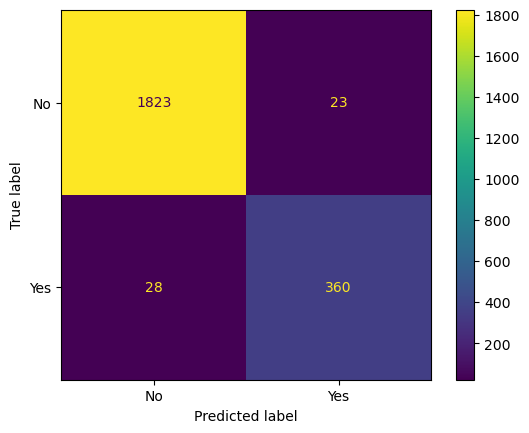

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
fig = ConfusionMatrixDisplay(conf_matrix, display_labels= ['No', 'Yes'], )
fig.plot()

### KNeighbors

In [66]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
knn.score(X_train, y_train) 

0.9710063808351058

In [68]:
knn.score(X_test, y_test)

0.9565801253357207

In [69]:
y_pred = knn.predict(X_test)

In [70]:
knn_accuracy, knn_precision, knn_recall = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)
knn_accuracy, knn_precision, knn_recall

(0.9565801253357207, 0.8721227621483376, 0.8788659793814433)

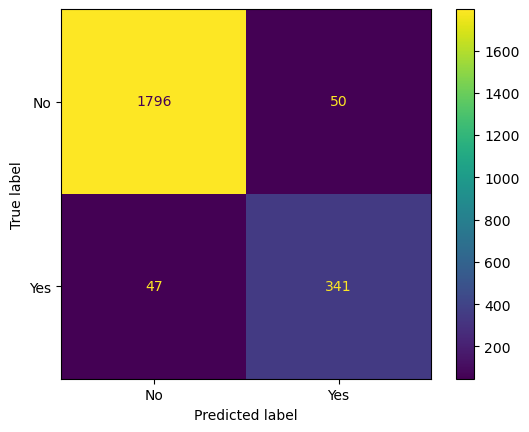

In [71]:
conf_matrix = confusion_matrix(y_test, y_pred)
fig = ConfusionMatrixDisplay(conf_matrix, display_labels= ['No', 'Yes'], )
fig.plot()

### Decision Tree Classifier 

In [72]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4, random_state=42)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [73]:
dtc.score(X_train, y_train)

0.9806336057315571

In [74]:
dtc.score(X_test, y_test)

0.981199641897941

In [75]:
x.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Department_IT',
       'Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [76]:
# visualize the decision tree 
from sklearn.tree import export_graphviz

# create visualization 
export_graphviz(
    dtc, 
    out_file='output/video3/employee_retention.dot',
    feature_names=x.columns,
    # class_names=df.left,
    rounded=True, 
    filled=True
)

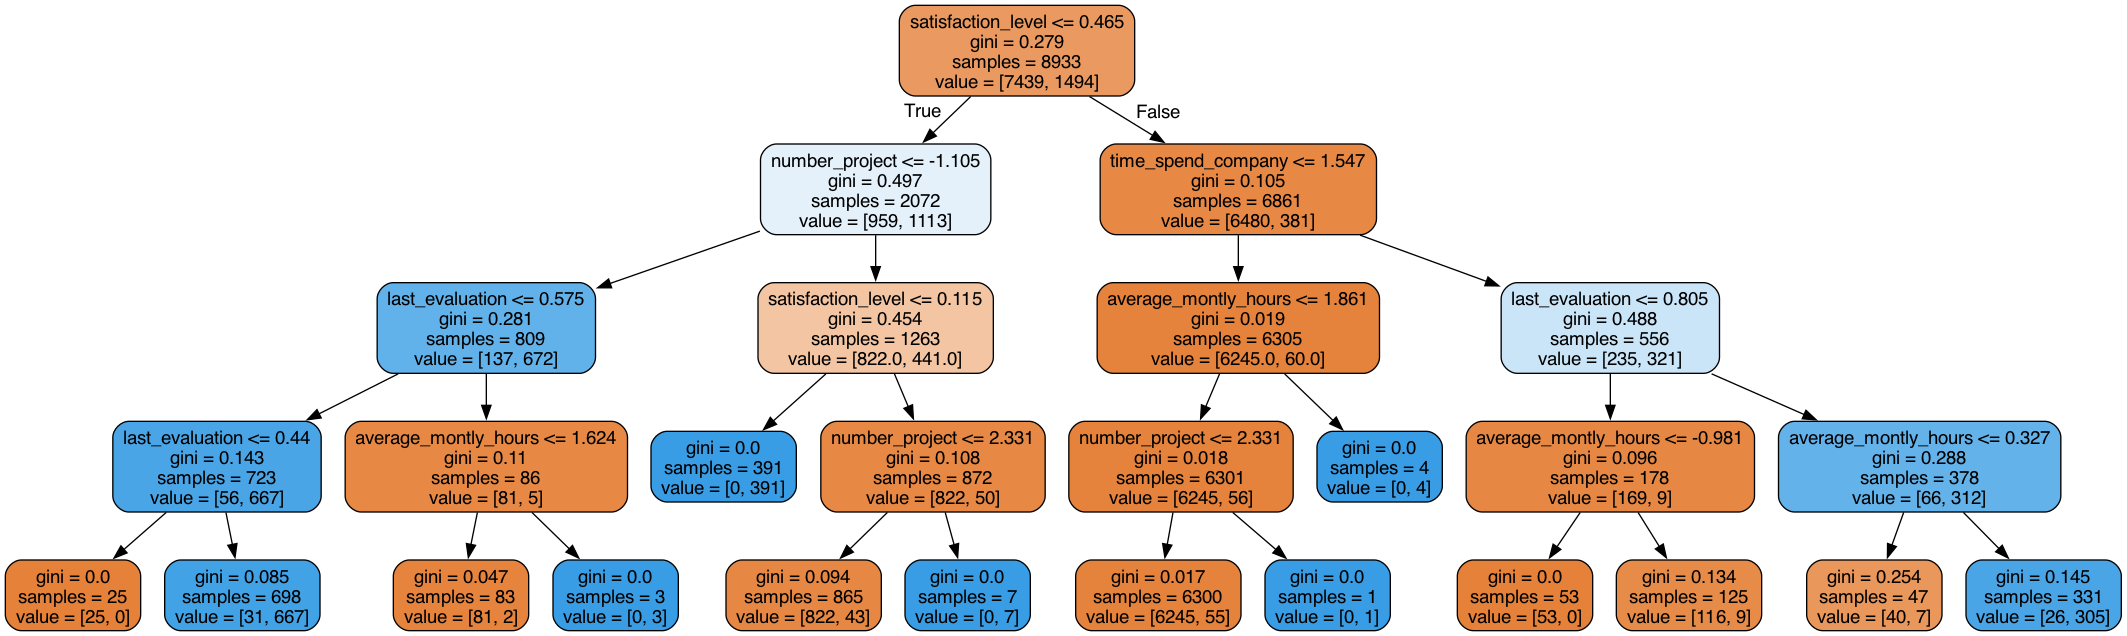

In [77]:
from PIL import Image

# open image
image_data = Image.open('output/video3/employee_retention.png').convert("RGB")
image_data

# Perform Logistic regression using Neural network 

In [162]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [163]:
X_train.shape

(3768, 18)

In [164]:
X_test.shape

(2234, 18)

In [165]:
X_train_full = X_train.copy()
y_train_full = y_train.copy()

In [166]:
# split training data to training and validation set 
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [167]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(shape=(18, )))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.layers

[<Dense name=dense, built=True>, <Dense name=dense_1, built=True>]

In [168]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,001 (3.91 KB)

 Trainable params: 1,001 (3.91 KB)

 Non-trainable params: 0 (0.00 B)

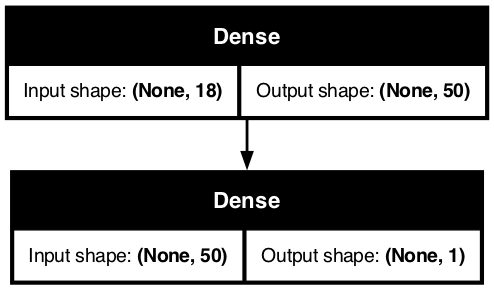

In [169]:
keras.utils.plot_model(model, show_shapes=True, dpi=100)

In [170]:
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [171]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50,
                                                  restore_best_weights=True)

In [172]:
hisory=model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3742 - loss: 0.7663 - val_accuracy: 0.8376 - val_loss: 0.5339
Epoch 2/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.8436 - loss: 0.5101 - val_accuracy: 0.8376 - val_loss: 0.4546
Epoch 3/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.8436 - loss: 0.4451 - val_accuracy: 0.8376 - val_loss: 0.4211
Epoch 4/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.8436 - loss: 0.4143 - val_accuracy: 0.8376 - val_loss: 0.3989
Epoch 5/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8436 - loss: 0.3929 - val_accuracy: 0.8376 - val_loss: 0.3808
Epoch 6/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.8436 - loss: 0.3751 - val_accuracy: 0.8376 - val_loss: 0.3646
Epoch 7/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.8438 - loss: 0.3593 - val_accuracy: 0.8376 - val_loss: 0.3501
Epoch 8/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.8437 - loss: 0.3450 - va

In [173]:
# evaluate score on valdiation set 
model.evaluate(X_test, y_test)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9694 - loss: 0.1141


[0.12652038037776947, 0.965532660484314]

In [180]:
X_val.iloc[:10]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
8497,0.79,0.66,0.183769,0.882510,-0.121393,False,False,False,False,False,False,False,True,False,False,False,False,True
6955,0.99,0.95,-0.675230,-0.970834,0.990661,False,False,False,False,False,True,False,False,False,False,True,False,False
5195,0.52,0.78,0.183769,0.758954,-0.121393,False,False,False,False,False,True,False,False,False,False,False,True,False
10480,0.81,0.54,-0.675230,0.305914,0.990661,False,False,False,False,False,False,False,True,False,False,False,True,False
1371,0.42,0.46,-1.534229,-1.176761,-0.121393,False,True,False,False,False,False,False,False,False,False,False,True,False
3990,0.89,0.93,0.183769,1.006066,-0.121393,False,False,False,False,False,False,False,True,False,False,False,True,False
5135,0.61,0.92,-0.675230,0.450063,0.990661,False,False,False,False,False,False,False,True,False,False,False,False,True
3318,0.48,0.86,1.042768,0.944288,-0.121393,False,False,False,False,False,False,False,False,False,True,False,True,False
235,0.83,0.85,0.183769,1.129623,2.102716,False,False,False,False,True,False,False,False,False,False,False,True,False
5035,0.54,0.51,0.183769,-1.300317,0.990661,False,True,False,False,False,False,False,False,False,False,False,False,True


In [181]:
y_val.iloc[:10]

8497     0
6955     0
5195     0
10480    0
1371     1
3990     0
5135     0
3318     0
235      1
5035     0
Name: left, dtype: int64

In [182]:
# check the best classifier created in scikit learn 
dtc.predict(X_val.iloc[:10])

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [185]:
def classify_sigmoid_prediction(y_values):
    return [ 0 if i <0.5 else 1 for i in y_values]

In [186]:
classify_sigmoid_prediction(model.predict(X_val.iloc[:10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

In [269]:
# Can we use Perceptron (single neuron) on insurance dataset ? 
from sklearn.linear_model import Perceptron

In [270]:
df_insurance.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [271]:
X = df_insurance["age"]
y = df_insurance["bought_insurance"]

In [272]:
per_clf = Perceptron(max_iter=1000, eta0=0.1)
per_clf.fit(X.to_numpy().reshape(-1, 1), y.to_numpy())

Perceptron(eta0=0.1)

In [273]:
per_clf.predict(X.to_numpy().reshape(-1, 1))

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0])

In [274]:
per_clf.coef_

array([[0.1]])

In [275]:
per_clf.intercept_

array([-3.7])

/var/folders/kx/s0nzgxq96zgdm61_51783vnm0000gn/T/ipykernel_18365/686301967.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [1/(1+math.exp(-y)) for y in z]


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

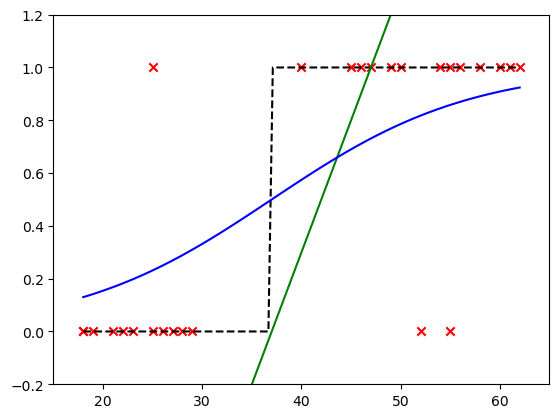

In [278]:
import numpy as np 

# get 100 points betweeen 18 to 62 
X_test_1 = np.linspace(18, 62, 100)
y_test_1 = per_clf.predict(X_test_1.reshape(-1, 1))

X_test_2 = X_test_1 
y_test_2 = per_clf.coef_ * X_test_2.reshape(-1, 1) + per_clf.intercept_

X_test_3 = X_test_1 
y_test_3 = sigmoid(y_test_2)

# plot this 
plt.axis([15, 65, -0.2, 1.2])
plt.scatter(x=df_insurance["age"], y=df_insurance["bought_insurance"], c="red", marker="x")
plt.plot(X_test_1, y_test_1, "k--")
plt.plot(X_test_2, y_test_2, "g-")
plt.plot(X_test_3, y_test_3, "b-")
plt.plot